In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [98]:
X_train_data = np.load('X_kannada_MNIST_train.npz')
X_train = X_train_data['arr_0']


In [99]:
y_train_data = np.load('y_kannada_MNIST_train.npz')
y_train = y_train_data['arr_0']



In [100]:
X_test_data = np.load('X_kannada_MNIST_test.npz')
X_test = X_test_data['arr_0']


In [101]:
y_test_data = np.load('y_kannada_MNIST_test.npz')
y_test = y_test_data['arr_0']

In [102]:
X_train.shape

(60000, 28, 28)

In [103]:
y_train.shape

(60000,)

In [104]:
X_test.shape

(10000, 28, 28)

In [105]:
y_test.shape

(10000,)

In [106]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)


In [107]:
X_train_reshape.shape

(60000, 784)

In [108]:
X_train_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [109]:
X_test_reshape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [110]:
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)


In [111]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ploting the hand written image randomly

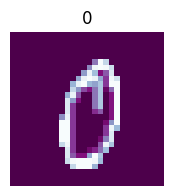

In [113]:
def plot_random_digit():
  random_index = np.random.randint(0,X_train.shape[0])
  plt.imshow(X_train[random_index], cmap='BuPu_r')
  plt.title(y_train[random_index])
  plt.axis('off')
plt.figure(figsize=[2,2])
plot_random_digit()

## performing PCA to 20 components.

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)



In [115]:
x_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,603.287390,-265.967106,29.543546,-322.437621,297.645767,124.931468,-101.682279,-40.148700,381.217191,-189.155744,112.944356,44.812009,-79.280763,-26.680256,-396.552743,257.331225,171.530401,-232.086042,-153.474898,188.011158
1,298.508142,-97.544829,53.099860,-549.041711,42.398392,-313.903559,-219.935393,244.058083,253.383487,261.283007,-271.493558,291.573118,-32.611704,-58.458492,-74.356504,-175.253672,345.622812,25.115172,96.484649,64.006070
2,-425.622137,646.150365,433.612085,-152.566211,162.643177,195.899411,43.390043,-399.691369,347.054166,-129.357426,199.498140,77.821457,-49.953085,-68.041040,110.180233,-56.197742,19.121814,303.120738,170.699205,-400.103791
3,-343.828555,100.668074,-415.924002,-8.474261,-103.484973,152.572257,-97.506050,-270.146182,-17.710673,158.536632,12.981373,15.823656,16.068325,-140.964731,55.573062,-83.628199,188.506372,-74.028118,-51.498438,-106.697704
4,-96.056321,3.559555,-516.641449,125.602907,22.231024,80.805426,69.481859,-86.792398,158.558097,180.525908,-90.587859,-89.488884,38.232883,-159.736956,-190.341732,167.907865,-112.613386,-2.954273,-140.074103,-95.597015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-210.913977,384.412680,741.318084,144.939606,-227.952428,1.582319,337.748685,56.588328,-338.282897,-4.557949,-11.189342,240.328564,258.686969,-47.291224,323.025741,39.642248,-350.621174,-79.717456,-207.172562,-169.225421
59996,-411.839792,45.667481,127.140898,-205.794020,-377.402339,-242.373486,121.599701,-321.753780,151.305476,65.724090,-133.376811,118.050932,170.773251,-175.733320,30.105309,9.403516,-38.015743,-95.031309,-154.093114,-106.210559
59997,-568.865928,5.946117,470.637993,-351.488050,-287.227570,-116.242158,75.656580,-223.201720,149.750216,-164.298042,25.335107,57.518058,-236.647157,-39.855914,41.965786,-135.046882,280.744663,-147.186929,-128.188532,-96.638572
59998,771.741992,-105.780667,296.497151,460.847780,-471.925246,-82.687904,-108.216901,-84.342343,72.165221,89.778755,97.062581,19.793154,-66.994536,63.446704,329.665608,-264.563619,188.785089,236.871580,-141.239992,-110.588079


In [116]:
x_test_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,279.360127,-604.630950,-176.073335,-322.230920,749.389896,-78.005640,196.955606,238.706559,455.205528,-308.558132,321.008872,171.652214,653.214193,681.843352,125.427891,165.646012,-52.535867,-207.224395,118.850228,323.617671
1,68.689919,-153.316911,-59.929824,-475.447876,305.786441,-400.516785,21.659569,303.820032,470.787783,-30.895857,-106.464992,450.808806,92.515020,128.058379,34.711850,-159.607002,80.185913,78.581472,-228.146495,-7.497677
2,-173.920104,-101.756158,-158.922308,139.188577,564.145347,-69.083690,138.508011,398.050014,681.343556,252.010109,124.599324,-160.663692,-216.232697,-105.193872,-126.296620,115.250685,-58.397687,-218.304979,-182.953691,184.132401
3,-258.215992,62.586134,-502.917372,-5.869353,390.681751,14.055570,-170.726093,109.832756,242.533430,-162.984506,106.398009,-168.258654,40.709370,-58.648167,259.647310,178.354771,214.848093,-160.099854,26.370038,-22.647000
4,-145.295068,51.348989,-517.376402,123.798777,140.383588,106.644266,156.060836,-316.142415,245.049854,151.558487,54.733794,-74.587923,-32.500451,-126.655447,-141.325476,227.698489,243.637262,-183.278547,-28.097218,28.258631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34.943983,102.682928,-382.820422,274.520121,-39.783527,-123.436789,234.983755,195.928848,48.756009,-78.037828,147.090245,-47.849667,5.311503,-148.796331,-99.355014,110.260380,-82.167319,61.666421,-4.724329,-62.280042
9996,-508.251359,-177.757911,-130.086140,23.491203,-105.807476,139.530586,-38.969773,-70.708506,89.489142,359.016683,-85.940008,-139.092180,-185.048584,-23.413228,-199.036366,-132.702475,-223.935976,33.283415,-41.221572,40.255930
9997,-541.203945,27.851743,55.254099,-84.474544,292.474825,185.018359,-75.188785,51.682845,86.102434,-1.018152,62.105989,48.403978,112.964447,-207.588773,127.993148,-129.202023,32.477812,-273.113697,71.754076,-173.130391
9998,648.876451,-49.691673,161.243832,-162.887762,-336.360173,37.123632,260.113196,-26.109490,51.421564,135.129518,-124.199420,-406.724508,-55.285298,57.257041,57.307629,-206.999349,312.801032,-120.275356,211.917121,-69.056809


# Normalizing  the data

In [117]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train_pca)
transformed_train_data = mm.transform(x_train_pca)
transformed_test_data = mm.transform(x_test_pca)
x_pca_train_trans = pd.DataFrame(transformed_train_data)
x_pca_test_trans = pd.DataFrame(transformed_test_data)

In [118]:
x_pca_train_trans.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.494385,0.352083,0.393206,0.441501,0.426625,0.469478,0.433478,0.429781,0.481307,0.493007,0.444699,0.481528,0.441584,0.407406,0.470246,0.442117,0.452150,0.452182,0.461371,0.483529
std,0.169977,0.137099,0.170133,0.142875,0.128648,0.133331,0.129761,0.135443,0.126810,0.123167,0.129753,0.127418,0.100913,0.116551,0.112697,0.113649,0.113601,0.112430,0.113102,0.118143
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.364023,0.263934,0.253559,0.345208,0.349895,0.369756,0.337723,0.331089,0.395692,0.410077,0.357136,0.394641,0.376399,0.325222,0.393155,0.365814,0.377408,0.377363,0.383380,0.404093
50%,0.503940,0.335521,0.385296,0.443891,0.429619,0.464237,0.432736,0.423808,0.479575,0.494760,0.446335,0.479587,0.437411,0.402827,0.466407,0.437666,0.453303,0.453054,0.459656,0.484661
75%,0.618434,0.405256,0.525669,0.535899,0.508288,0.568321,0.527388,0.521696,0.560998,0.577023,0.534172,0.566696,0.501789,0.484868,0.543162,0.513942,0.527029,0.527496,0.539167,0.563193
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## • K-NN Classifier model

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
params = {'n_neighbors': range(3,10),
          'weights':['uniform', 'distance'],
          'metric':['manhattan','eculidean','cosine']}
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
skf = StratifiedKFold(n_splits = 5)

rcv_knn = RandomizedSearchCV(knn_pca, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_knn.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['manhattan', 'eculidean',
                                                   'cosine'],
                                        'n_neighbors': range(3, 10),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [120]:
rcv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'cosine'}

In [121]:
rcv_knn.best_score_

0.96425

In [122]:
finalmodel_knn_mnist = knn_pca.set_params(**rcv_knn.best_params_)
finalmodel_knn_mnist.fit(x_pca_train_trans, y_train)
knnpreds_mnist = finalmodel_knn_mnist.predict(x_pca_test_trans)

## Evaluation (KNN)

Precision: 0.9203759150540847
Recall: 0.9164
F1-score: 0.9162038782856212
Confusion Matrix:
[[814 149   3  12   4   0   1   2   9   6]
 [  7 970   0   7   6   0   0   0   8   2]
 [  2   0 986   2   1   3   5   0   0   1]
 [  8  15   3 904  24  24   2  18   2   0]
 [  0   0   0   3 974   8   4   1   5   5]
 [  1   0   0  13  90 888   6   0   2   0]
 [  3   2   4   2  38  24 897  14   2  14]
 [  6   1   0  34  36   4  72 821   2  24]
 [ 20   7   1   0   5   1   1   0 962   3]
 [  1   7   0   0  11   5  10   1  17 948]]
AUC : 0.9797848577777776


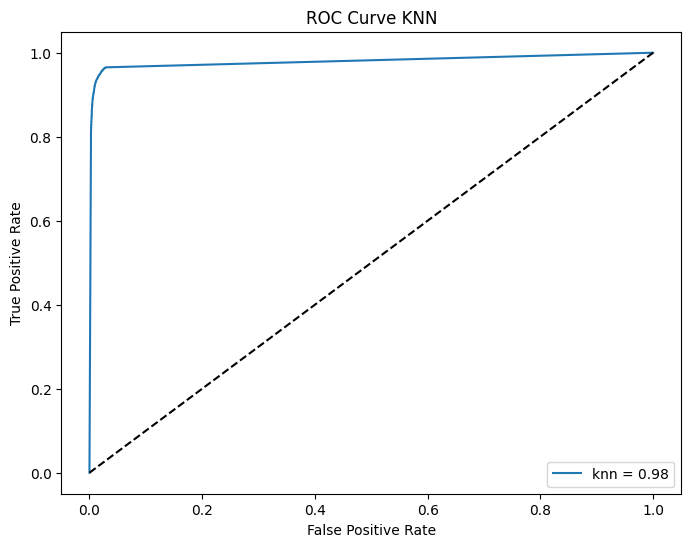

In [123]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, knnpreds_mnist,average = 'macro')
recall = recall_score(y_test, knnpreds_mnist,average = 'macro')
f1 = f1_score(y_test, knnpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,knnpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

#calculate AUC

from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_knn = finalmodel_knn_mnist.predict_proba(x_pca_test_trans)
fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),predict_proba_knn.ravel())
auc = auc(fpr_knn,tpr_knn)

print("AUC :", auc)

# plotting ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'knn = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc='lower right')
plt.show()

## DECISION TREES

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
model =  DecisionTreeClassifier()

params = {'criterion':['gini','entropy'],
          'splitter':['best','random'],
          'max_depth':range(3,50),
          }

skf = StratifiedKFold(n_splits = 5)

rcv_dt = RandomizedSearchCV(model, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv_dt.fit(x_pca_train_trans, y_train)

rcv_dt.best_score_


0.8963000000000001

In [125]:
rcv_dt.best_params_

{'splitter': 'best', 'max_depth': 13, 'criterion': 'entropy'}

In [126]:
finalmodel_dt_mnist = model.set_params(**rcv_dt.best_params_)
finalmodel_dt_mnist.fit(x_pca_train_trans, y_train)
dtpreds_mnist = finalmodel_dt_mnist.predict(x_pca_test_trans)

## EVALUATION (DECISION TREE)

Precision: 0.8135014576034211
Recall: 0.8124
F1-score: 0.8120184535471722
Confusion Matrix:
[[719 169   8  31   7   1   3  11  28  23]
 [ 64 840   2  24   5  15   4  10  20  16]
 [  5   2 926  12   8  20  12   5   3   7]
 [ 19  11   6 791  25  26  34  67  11  10]
 [  1   2   4  39 843  49  12  11  10  29]
 [  6   8   4  21 119 791   8   8  15  20]
 [ 12  12   6  41  22  27 792  55  12  21]
 [  6  16   4  53  34   6 110 710   7  54]
 [ 59  26  11   0   7  21   7   1 859   9]
 [ 18  25   2   5  25   4  10   8  50 853]]
AUC: 0.9088947544444446


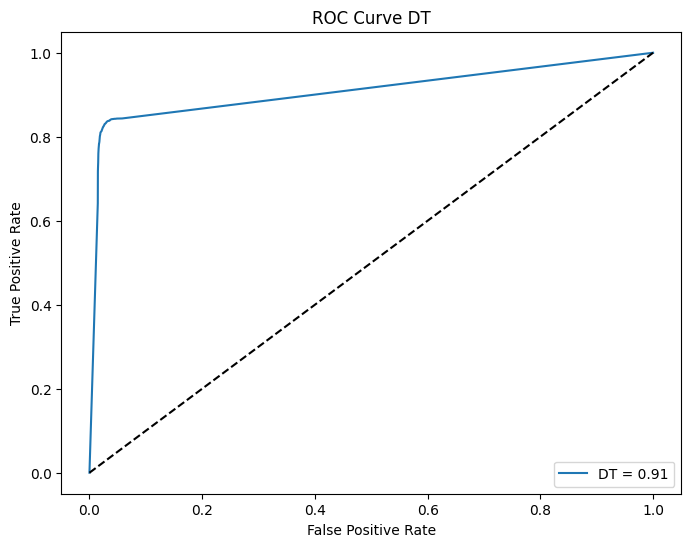

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, dtpreds_mnist,average = 'macro')
recall = recall_score(y_test, dtpreds_mnist,average = 'macro')
f1 = f1_score(y_test, dtpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,dtpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_dt =  finalmodel_dt_mnist.predict_proba(x_pca_test_trans)
fpr_dt,tpr_dt,thersholds_dt = roc_curve(y_test_bin.ravel(),predict_proba_dt.ravel())
auc = auc(fpr_dt,tpr_dt)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'DT = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DT')
plt.legend(loc='lower right')
plt.show()


## RANDOM FOREST

# On non- normalized data

Precision: 0.9038801575806289
Recall: 0.9006000000000001
F1-score: 0.9000483973497229
Confusion Matrix:
[[801 148   2  20   4   0   2   1  17   5]
 [ 18 932   1  25   6   1   0   0  11   6]
 [  4   0 984   3   0   5   1   1   1   1]
 [ 11  11   1 923  13  18   5  16   2   0]
 [  0   1   0  19 944  16   3   3   8   6]
 [  0   1   0  10 105 872   2   3   5   2]
 [  3   5   1  28  20  21 887  17   1  17]
 [  8   8   0  37  21   3  97 777   7  42]
 [ 15   4   1   0   2   5   3   0 968   2]
 [  4   6   0   0  14   0   6   1  51 918]]
AUC: 0.9935187605555554


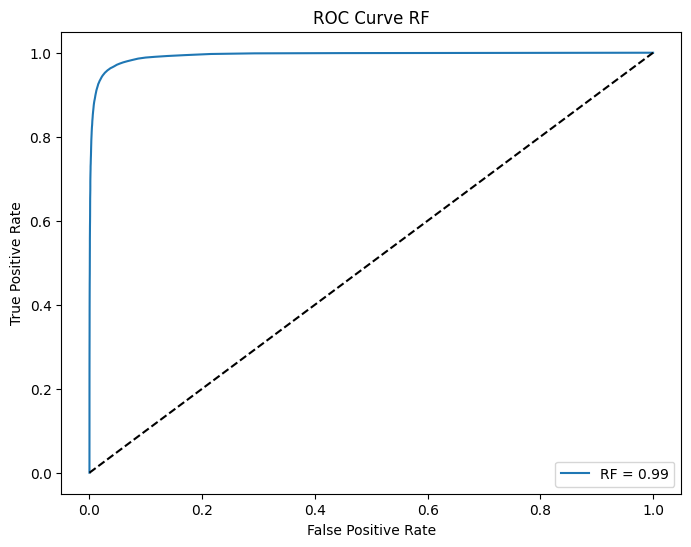

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_train_pca, y_train)
rfpreds_mnist = rf_mnist.predict(x_test_pca)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_test_pca)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# On Normalized data

Precision: 0.9059389569573371
Recall: 0.9026
F1-score: 0.901999626873389
Confusion Matrix:
[[803 146   1  18   5   0   2   1  18   6]
 [ 14 936   1  21   5   5   1   1  10   6]
 [  3   1 985   3   0   6   1   0   1   0]
 [  9  10   1 922  16  15   4  17   5   1]
 [  0   1   0  15 950  15   4   2   7   6]
 [  0   0   0  15  92 879   4   2   5   3]
 [  3   4   1  24  20  21 893  16   2  16]
 [  5  10   0  39  23   3 102 773   4  41]
 [ 16   4   1   1   1   5   2   0 968   2]
 [  3   8   0   0  13   1   7   2  49 917]]
AUC: 0.9935917772222222


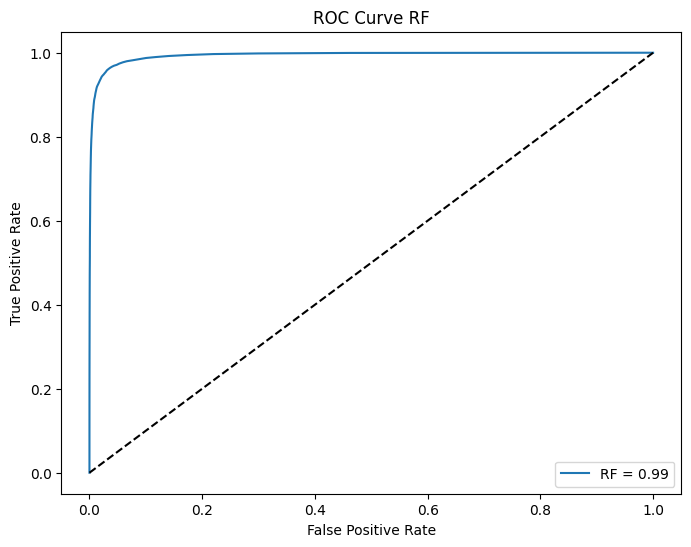

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf_mnist = RandomForestClassifier()
rf_mnist.fit(x_pca_train_trans, y_train)
rfpreds_mnist = rf_mnist.predict(x_pca_test_trans)


## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = rf_mnist.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()


# OPTIMIZED MODEL

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
rf_mnist = RandomForestClassifier()

params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':['sqrt', 'log2', None]
          # 'max_depth':range(3,50),
          }



skf = StratifiedKFold(n_splits = 10)

rcv = RandomizedSearchCV(rf_mnist, param_distributions = params, cv = skf, scoring = 'accuracy')
rcv.fit(x_pca_train_trans, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': range(1, 10)},
                   scoring='accuracy')

In [131]:
rcv.best_params_

{'n_estimators': 9, 'max_features': 'log2', 'criterion': 'entropy'}

In [132]:
rcv.best_score_

0.9426166666666667

In [133]:
finalmodel_rf = rf_mnist.set_params(**rcv.best_params_)
finalmodel_rf.fit(x_pca_train_trans, y_train)
rfpreds_mnist = finalmodel_rf.predict(x_pca_test_trans)

Precision: 0.8782687198535626
Recall: 0.8749
F1-score: 0.8744343224237298
Confusion Matrix:
[[807 141   1  22   1   0   3   3  13   9]
 [ 34 904   2  24   6   3   0   4  14   9]
 [  5   2 978   5   1   6   1   0   2   0]
 [ 17   8   2 896  22  14   8  27   4   2]
 [  0   0   0  32 923  20   6   4   9   6]
 [  1   7   1  13 120 845   2   1   6   4]
 [  4   8   6  42  18  30 855  21   4  12]
 [ 12  15   5  50  31   3 114 734   5  31]
 [ 29  12   3   5   5  14   2   0 921   9]
 [  4  13   1   1  17   0   9   5  64 886]]
AUC: 0.9804314155555556


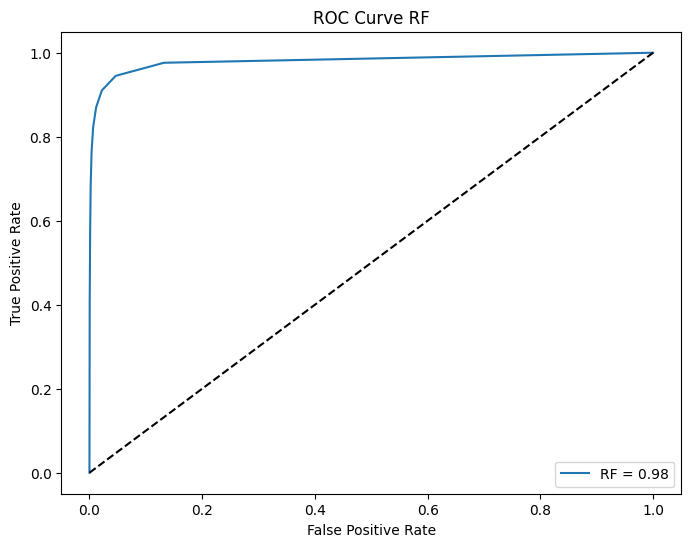

In [134]:
## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, rfpreds_mnist,average = 'macro')
recall = recall_score(y_test, rfpreds_mnist,average = 'macro')
f1 = f1_score(y_test, rfpreds_mnist,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,rfpreds_mnist)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = finalmodel_rf.predict_proba(x_pca_test_trans)
fpr_rf,tpr_rf,thersholds_rf = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_rf,tpr_rf)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RF')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

Precision: 0.800290399190622
Recall: 0.7971000000000001
F1-score: 0.7957322504858708
Confusion Matrix:
[[623 230  16  46   9   0   2  11  55   8]
 [ 16 803   2  90   8   6   0   3  56  16]
 [ 15   1 972   4   0   4   2   0   1   1]
 [ 19   9   2 807  32  19  22  90   0   0]
 [  2   0   0  21 882  26   4  21  31  13]
 [  0   1   5  36 180 731   4  23  17   3]
 [  7   5  37  14  25  50 807  40   1  14]
 [ 10  11   4  45  32   1 181 698   4  14]
 [ 98  25  25   2   2   6   1   3 828  10]
 [ 15  10   5   0  19   0   8  16 107 820]]
AUC: 0.9754018022222222


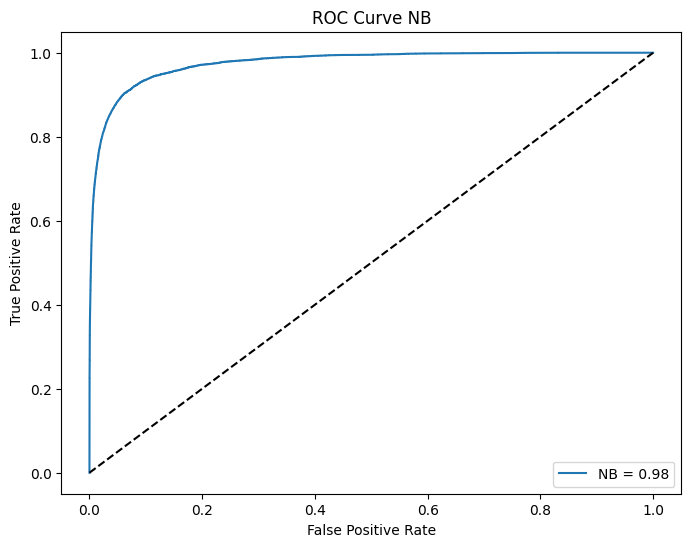

In [135]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_pca_train_trans, y_train)

predictions_nb = naive_bayes.predict(x_pca_test_trans)

## Evaluation

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_nb,average = 'macro')
recall = recall_score(y_test, predictions_nb,average = 'macro')
f1 = f1_score(y_test, predictions_nb,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_nb)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_rf = naive_bayes.predict_proba(x_pca_test_trans)
fpr_nb,tpr_nb,thersholds_nb = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_nb,tpr_nb)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'NB = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve NB')
plt.legend(loc='lower right')
plt.show()


## SVM

Precision: 0.9330506124859363
Recall: 0.9311
F1-score: 0.9307684521850849
Confusion Matrix:
[[855 109   0  16   3   0   0   2  10   5]
 [ 10 964   0  13   3   0   3   1   3   3]
 [  3   1 991   2   0   1   1   0   1   0]
 [  8   6   3 926  17  20   5  15   0   0]
 [  0   1   1   9 969   6   2   0   5   7]
 [  0   0   0   9  73 909   2   2   4   1]
 [  1   0   0   7  20  15 939   5   0  13]
 [ 15   5   0  30  16   3  68 829   0  34]
 [ 10   1   0   0   2   3   2   0 980   2]
 [  6   9   0   0  10   0   2   0  24 949]]
AUC: 0.9754018022222222


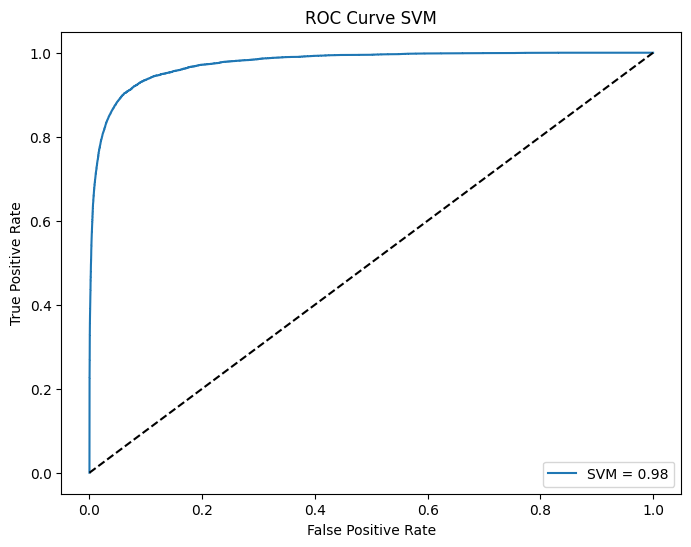

In [136]:
from sklearn.svm import SVC

svc_mnist= SVC(probability = True)
svc_mnist.fit(x_pca_train_trans, y_train)
predictions_svc = svc_mnist.predict(x_pca_test_trans)

## Evaluation
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, predictions_svc,average = 'macro')
recall = recall_score(y_test, predictions_svc,average = 'macro')
f1 = f1_score(y_test, predictions_svc,average = 'macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Calculate confusion matrix
cm = confusion_matrix(y_test,predictions_svc)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# calculate AUC
from sklearn.metrics import roc_curve, auc
y_test_bin = label_binarize(y_test,classes=range(10))
predict_proba_svc = svc_mnist.predict_proba(x_pca_test_trans)
fpr_svc,tpr_svc,thersholds_svc = roc_curve(y_test_bin.ravel(),predict_proba_rf.ravel())
auc = auc(fpr_svc,tpr_svc)

print("AUC:",auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label=f'SVM = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc='lower right')
plt.show()